In [134]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:

    reader=csv.reader(file) 
df=pd.read_csv("data_set.csv", skipinitialspace = True)

df.head()


,Style,Price,Rating,Size,Season,Neckline,SleeveLength,WaistLine,Material,FabricType,...,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Stock_On_Hand
0,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,?,chiffon,...,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Ciudad de Mexico 2,Cuidad de Mexico,Airport,05-04-2012,84.0
1,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,?,...,1,PlayDoh Can,Art & Crafts,$1.99,$2.99,Maven Toys Puebla 1,Puebla,Commercial,12/16/2008,18.0
2,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,?,...,1,Hot Wheels 5-Pack,Toys,$3.99,$5.99,Maven Toys Ciudad Victoria 1,Ciudad Victoria,Downtown,09-08-2010,13.0
3,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,...,1,Barrel O' Slime,Art & Crafts,$1.99,$3.99,Maven Toys Oaxaca 1,Oaxaca,Downtown,10-02-2010,55.0
4,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,...,1,Rubik's Cube,Games,$17.99,$19.99,Maven Toys Monterrey 1,Monterrey,Residential,4/27/1995,50.0


In [ ]:
Solve Section B questions using these below columns - 
1.Style
2.Price
3.Rating
4.Size
5.Season
6.Neckline
7.SleeveLength
8.WaistLine
9.Material
10.FabricType
11.Decoration
12.PatternType
13.Recommendation

In [135]:
#Code to retrive the data frame for Section B
dresses = df.iloc[:, :13]
dresses.head(1)

,Style,Price,Rating,Size,Season,Neckline,SleeveLength,WaistLine,Material,FabricType,Decoration,PatternType,Recommendation
0,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,?,chiffon,ruffles,animal,1


In [ ]:
Solve Section C questions using these below columns - 
1.Product_ID
2.Date
3.Units
4.Product_Name
5.Product_Category
6.Product_Cost
7.Product_Price
8.Store_Name
9.Store_City
10.Store_Location
11.Store_Open_Date
12.Stock_On_Hand

In [3]:
#Code to retrive the data frame for Section C
Product_sales = df.iloc[:, 13:]
Product_sales.head(1)

,Product_ID,Date,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Stock_On_Hand
0,8,4/29/2018,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Ciudad de Mexico 2,Cuidad de Mexico,Airport,05-04-2012,84.0


In [105]:
dresses = df.iloc[:, :13]
dresses.head(1)

,Style,Price,Rating,Size,Season,Neckline,SleeveLength,WaistLine,Material,FabricType,Decoration,PatternType,Recommendation
0,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,?,chiffon,ruffles,animal,1


In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.A) Separate categorical data and numerical.

In [137]:
catag = dresses.select_dtypes(include = 'object')
numeric = dresses.select_dtypes(include = 'number')

In [138]:
catag.count()

Style           500
Price           500
Size            500
Season          500
Neckline        500
SleeveLength    500
WaistLine       500
Material        500
FabricType      500
Decoration      500
PatternType     500
dtype: int64

#### 2.B) Finding out the percentage of '?' values in each column and Replace '?' from the Dataset to NaN values .

In [139]:
for i in range(1, len(dresses.columns)):
    x = dresses.iloc[:,i]
    print ('Percentage of ? in column', dresses.columns[i-1],'is : ',(x[x == '?'].count()/x.count()) * 100)


Percentage of ? in column Style is :  0.4
Percentage of ? in column Price is :  0.0
Percentage of ? in column Rating is :  0.0
Percentage of ? in column Size is :  0.4
Percentage of ? in column Season is :  0.6
Percentage of ? in column Neckline is :  0.4
Percentage of ? in column SleeveLength is :  17.4
Percentage of ? in column WaistLine is :  25.6
Percentage of ? in column Material is :  53.2
Percentage of ? in column FabricType is :  47.199999999999996
Percentage of ? in column Decoration is :  21.8
Percentage of ? in column PatternType is :  0.0


In [140]:
dresses.replace('?', np.nan, inplace = True)

#### Using appropriate treatment to convert un-readably columns into comprehensible ones.

In [141]:
print(dresses.Price.value_counts())
print(dresses.Size.value_counts())
print(dresses.Season.value_counts())
print(dresses.SleeveLength.value_counts())

Average      252
Low          129
low           45
Medium        30
very-high     21
high          15
High           6
Name: Price, dtype: int64
M        177
free     173
L         96
S         37
XL        15
s          1
small      1
Name: Size, dtype: int64
Summer    159
Spring    122
Winter     99
Automn     61
winter     46
Autumn      8
spring      2
summer      1
Name: Season, dtype: int64
sleevless         223
full               97
short              96
halfsleeve         35
threequarter       17
thressqatar        10
sleeveless          5
capsleeves          3
sleeevless          3
cap-sleeves         2
Petal               1
half                1
turndowncollor      1
threequater         1
sleveless           1
butterfly           1
urndowncollor       1
Name: SleeveLength, dtype: int64


In [142]:
prc = {'low':'Low','high':'High','very-high':'High','Average':'Average','Low':'Low','Medium':'Average','High':'High'}
sz = {'s':'S','small':'S','M':'M','free':'free','S':'S','XL':'XL'}
szn = {'winter':'Winter','spring':'Spring','summer':'Summer','Summer':'Summer','Spring':'Spring','Winter':'Winter',
       'Automn':'Autumn','Autumn':'Autumn'}
slv = {'sleeveless':'sleevless','sleeevless':'sleevless','cap-sleeves':'capsleeves',
       'half':'halfsleeve','sleveless':'sleevless','urndowncollor':'turndowncollor',
       'thressqatar':'threequarter','threequater':'threequarter',
       'full':'full','short':'short','halfsleeve':'halfsleeve',
       'threequarter':'threequarter','capsleeves':'capsleeves',
       'Petal':'Petal','turndowncollor':'turndowncollor','butterfly':'butterfly','sleevless':'sleevless'}

In [143]:
dresses['Price'] = dresses['Price'].map(prc)

In [144]:
dresses.Size = dresses.Size.map(sz)
dresses.Season = dresses.Season.map(szn)
dresses.SleeveLength = dresses.SleeveLength.map(slv)

In [145]:
dresses.head()

,Style,Price,Rating,Size,Season,Neckline,SleeveLength,WaistLine,Material,FabricType,Decoration,PatternType,Recommendation
0,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,Casual,Low,0.0,NaN,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,vintage,High,0.0,NaN,Autumn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,Brief,Average,4.6,NaN,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


#### 2.D)Graphical Analysis

([<matplotlib.patches.Wedge at 0x7fdcb76f12e8>,
 [Text(-0.22734510781970704, 1.0762500647853388, 'Average'),
  Text(-0.062419862344239345, -1.0982275541912643, 'Low'),
  Text(1.061615107814635, -0.28805097267622853, 'High')])

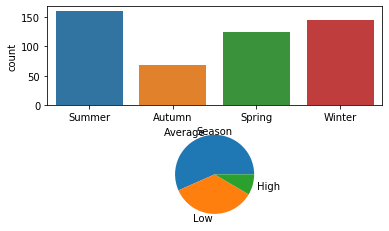

In [146]:
plt.subplot(2,1,1)
sns.countplot(dresses.Season)

plt.subplot(2,1,2)
plt.pie(dresses.Price.value_counts(), labels = dresses.Price.value_counts().index)

#### 2.E) Calculate the number of dreeses available in different size in every price class.  plotting the data using appropriate visualisation plot.

In [147]:
pd.crosstab(index = dresses.Price, columns = dresses.Size)

Size,M,S,XL,free
Price,,,,
Average,113,27,10,72
High,24,2,1,5
Low,40,10,4,95


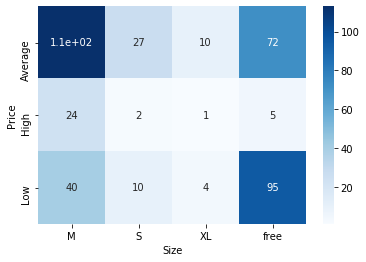

In [148]:
sns.heatmap(pd.crosstab(index = dresses.Price, columns = dresses.Size), cmap = 'Blues', annot = True)

<b>Inference</b>
- The most number of dresses available are the ones that are of Average Price and Medium size. This is true as statistically, the most people demand clothes that fit all and thus the number of customers in those segments are mmore, which explains the higher number. This is also represented by a darker shade of blue.
- The price range of High and Size XL has the least dresses of 1. This makes is a statistical outlier and rightly so as both the price and the size are extreme.

In [149]:
Product_sales = df.iloc[:, 13:]
Product_sales.head(1)

,Product_ID,Date,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Stock_On_Hand
0,8,4/29/2018,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Ciudad de Mexico 2,Cuidad de Mexico,Airport,05-04-2012,84.0


#### 3.A) Creating new columns by splitting the `Date` column into Day,Month and Year 

In [169]:
import datetime
day = []
month = []
year = []
for i in range(len(Product_sales.Date)):
    if ('/' in Product_sales.Date[i]):
        datem  = datetime.datetime.strptime(Product_sales.Date[i],"%m/%d/%Y")
    elif ('-' in Product_sales.Date[i]):
        datem = datetime.datetime.strptime(Product_sales.Date[i], "%m-%d-%Y")
    day.append(datem.day)
    month.append(datem.month)
    year.append(datem.year)
Product_sales['Day'] = day
Product_sales['Month'] = month
Product_sales['Year'] = year

In [170]:
Product_sales.head()

,Product_ID,Date,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Stock_On_Hand,Day,Month,Year
0,8,4/29/2018,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Ciudad de Mexico 2,Cuidad de Mexico,Airport,05-04-2012,84.0,29,4,2018
1,25,04-08-2018,1,PlayDoh Can,Art & Crafts,$1.99,$2.99,Maven Toys Puebla 1,Puebla,Commercial,12/16/2008,18.0,8,4,2018
2,15,2/25/2018,1,Hot Wheels 5-Pack,Toys,$3.99,$5.99,Maven Toys Ciudad Victoria 1,Ciudad Victoria,Downtown,09-08-2010,13.0,25,2,2018
3,3,01-05-2018,1,Barrel O' Slime,Art & Crafts,$1.99,$3.99,Maven Toys Oaxaca 1,Oaxaca,Downtown,10-02-2010,55.0,5,1,2018
4,30,02-08-2018,1,Rubik's Cube,Games,$17.99,$19.99,Maven Toys Monterrey 1,Monterrey,Residential,4/27/1995,50.0,8,2,2018


#### 3.B) Create new column `Product_profit` from `Product_Price` and `Product_Cost` columns ?

#### Check the distribution of the `Product_profit`.

#### What inferences can be made about distribution of the `Product_profit` ?

In [185]:
import re
prof = []
for i in range (len(Product_sales)):
    r = Product_sales.Product_Cost[i]
    d = Product_sales.Product_Price[i]
    cost = [float(s) for s in re.findall(r'-?\d+\.?\d*',r)]
    price = [float(s) for s in re.findall(r'-?\d+\.?\d*',d)]
    g = price[0] - cost[0]
    prof.append(g)
Product_sales['Product_profit'] = prof

In [186]:
Product_sales.head()

,Product_ID,Date,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Stock_On_Hand,Day,Month,Year,Product_profit
0,8,4/29/2018,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Ciudad de Mexico 2,Cuidad de Mexico,Airport,05-04-2012,84.0,29,4,2018,3.0
1,25,04-08-2018,1,PlayDoh Can,Art & Crafts,$1.99,$2.99,Maven Toys Puebla 1,Puebla,Commercial,12/16/2008,18.0,8,4,2018,1.0
2,15,2/25/2018,1,Hot Wheels 5-Pack,Toys,$3.99,$5.99,Maven Toys Ciudad Victoria 1,Ciudad Victoria,Downtown,09-08-2010,13.0,25,2,2018,2.0
3,3,01-05-2018,1,Barrel O' Slime,Art & Crafts,$1.99,$3.99,Maven Toys Oaxaca 1,Oaxaca,Downtown,10-02-2010,55.0,5,1,2018,2.0
4,30,02-08-2018,1,Rubik's Cube,Games,$17.99,$19.99,Maven Toys Monterrey 1,Monterrey,Residential,4/27/1995,50.0,8,2,2018,2.0


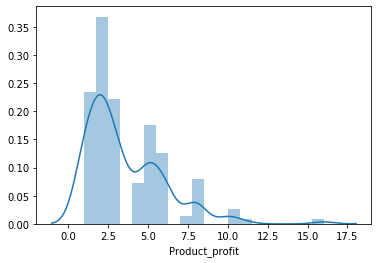

In [187]:
sns.distplot(Product_sales.Product_profit)

Inferences:
    - Positively Skewed Data
    - Most profits arrive from products that have a margin of profit between 1.5 - 3
    - Right tail is thin of the distribution plot
    - Mode a ~2.3 Dollar Profit?

#### 3.C) Using the appropriate plot to display product categories and the average profit in every product category. 

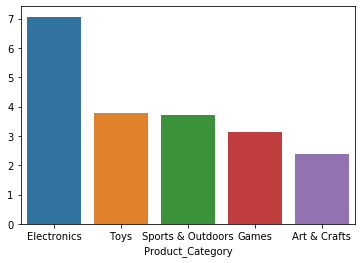

In [195]:
labels = Product_sales.groupby('Product_Category')['Product_profit'].mean().sort_values(ascending = False).index
values = Product_sales.groupby('Product_Category')['Product_profit'].mean().sort_values(ascending = False).values

sns.barplot(x = labels, y = values)

#### 3.D) Making recommendations to the company about which products should be ordered and kept in inventory from the stock in hand and demand of the products.

In [244]:
demand = Product_sales.Product_Name.value_counts().head(10).index
demand2 = Product_sales.Product_Name.value_counts().head(10)
#for i in range(len(Product_sales)):
    #print(Product_sales.Product_Name[i] in demand)
Inventory = Product_sales[Product_sales.Product_Name.isin(demand)].groupby('Product_Name')['Stock_On_Hand'].sum().sort_index().values
DD = demand2.sort_index().values
DD2 = demand2.sort_index().index
pd.DataFrame(zip(DD2,Inventory,DD), columns = ['Name','Inventory','Demand'])


,Name,Inventory,Demand
0,Action Figure,324.0,24
1,Barrel O' Slime,1287.0,53
2,Colorbuds,773.0,30
3,Deck Of Cards,2429.0,37
4,Dino Egg,573.0,30
5,Lego Bricks,771.0,33
6,Magic Sand,1301.0,37
7,Mini Ping Pong Set,504.0,21
8,PlayDoh Can,1810.0,39
9,Rubik's Cube,686.0,26


This shows how much inventory is there versus how much demand is there for the top products.
These products, as visible are over-ordered in expectation of demand. This habit must be stopped and thus products with significantly lesser inventory that demand must me ordered to retail the supply chain and satisfy customers.

#### 3.E) Check if there is correlation between the variables and write down your observations. 

In [199]:
Product_sales.corr()

,Product_ID,Units,Stock_On_Hand,Day,Month,Year,Product_profit
Product_ID,1.000000,-0.016570,0.006420,-0.034955,-0.000716,NaN,-0.200960
Units,-0.016570,1.000000,0.082185,-0.034404,-0.040004,NaN,-0.187595
Stock_On_Hand,0.006420,0.082185,1.000000,-0.038081,0.005299,NaN,-0.214928
Day,-0.034955,-0.034404,-0.038081,1.000000,-0.006628,NaN,-0.056084
Month,-0.000716,-0.040004,0.005299,-0.006628,1.000000,NaN,-0.005915
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_profit,-0.200960,-0.187595,-0.214928,-0.056084,-0.005915,NaN,1.000000


Negative b/w sotck and profit
positive b/w profit and product
negative b/w prof and units